# Import Libraries

In [158]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load Dataset
This dataset features real estate listings across the United States, categorized by state and zip code. The original dataset, sourced from Kaggle, contained 2.2 million entries. We narrowed down the data by focusing exclusively on properties in Texas, resulting in a reduced dataset with 12 columns and 40,111 rows.


In [88]:
# Load the dataset into a pandas DataFrame

Real_Estate_data_df = pd.read_csv('USA Real Estate Dataset new.csv')


In [89]:
Real_Estate_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852,600.0,NaN
1,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632,NaN,NaN
2,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632,NaN,NaN
3,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632,NaN,NaN
4,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632,NaN,NaN


# Data Exploration and Cleaning

In the data exploration phase, we thoroughly examined the dataset to understand its structure, variable types, and key statistics. We utilized visualizations like histograms and scatter plots to identify patterns, relationships, and outliers in the data.

For data cleaning, we addressed missing values, removed duplicates, and ensured correct data types for each column. We also drop the columns we dont need for data analysis. The cleaned dataset was then validated and prepared for further analysis or modeling.

In [90]:
Real_Estate_data_df.shape

(40111, 12)

In [91]:
# Display the basic information of the dataframe
print(Real_Estate_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40111 entries, 0 to 40110
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     40093 non-null  float64
 1   status          40111 non-null  object 
 2   price           40053 non-null  float64
 3   bed             28761 non-null  float64
 4   bath            27158 non-null  float64
 5   acre_lot        36224 non-null  float64
 6   street          40004 non-null  float64
 7   city            40094 non-null  object 
 8   state           40111 non-null  object 
 9   zip_code        40111 non-null  int64  
 10  house_size      28903 non-null  float64
 11  prev_sold_date  15315 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB
None


In [92]:
# summary statistics
print(Real_Estate_data_df.describe())

         brokered_by         price           bed          bath      acre_lot  \
count   40093.000000  4.005300e+04  28761.000000  27158.000000  36224.000000   
mean    52715.409997  4.856361e+05      3.476931      2.678548     11.630184   
std     29786.509676  8.704503e+05      1.337864      1.212267    106.481943   
min        51.000000  0.000000e+00      1.000000      1.000000      0.000000   
25%     26918.000000  1.800000e+05      3.000000      2.000000      0.170000   
50%     52410.000000  3.400000e+05      3.000000      2.000000      0.340000   
75%     78031.000000  5.199000e+05      4.000000      3.000000      2.010000   
max    110142.000000  3.468000e+07     99.000000     25.000000   7085.560000   

             street      zip_code    house_size  
count  4.000400e+04  40111.000000  28903.000000  
mean   1.060828e+06  75815.313355   2314.157354  
std    6.059690e+05    772.033707   1379.643195  
min    2.300000e+01  11111.000000    100.000000  
25%    5.323715e+05  75206.00

In [93]:
Real_Estate_data_df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code            int64
house_size        float64
prev_sold_date     object
dtype: object

In [94]:
# Check the value counts
print(Real_Estate_data_df['status'].value_counts())

status
for_sale          38497
ready_to_build     1614
Name: count, dtype: int64


In [95]:
# checking for missing values
print(Real_Estate_data_df.isnull().sum())

brokered_by          18
status                0
price                58
bed               11350
bath              12953
acre_lot           3887
street              107
city                 17
state                 0
zip_code              0
house_size        11208
prev_sold_date    24796
dtype: int64


In [96]:
# Checking for duplicates
print(Real_Estate_data_df.duplicated().sum())

0


In [97]:
# Convert prev_sold_date to datetime
Real_Estate_data_df['prev_sold_date'] = pd.to_datetime(Real_Estate_data_df['prev_sold_date'])

In [98]:
Real_Estate_data_df.shape

(40111, 12)

In [99]:
missing_rows = Real_Estate_data_df[Real_Estate_data_df.isnull().any(axis=1)]
print(missing_rows)

       brokered_by    status     price  bed  bath  acre_lot     street  \
0          33968.0  for_sale   99000.0  1.0   1.0      5.00    49388.0   
1          88188.0  for_sale   58800.0  NaN   NaN      1.00   841041.0   
2          88188.0  for_sale   58800.0  NaN   NaN      1.00   844563.0   
3          88188.0  for_sale   58800.0  NaN   NaN      1.00   845421.0   
4          88188.0  for_sale   58800.0  NaN   NaN      1.00   859147.0   
...            ...       ...       ...  ...   ...       ...        ...   
40106      68915.0  for_sale  467847.0  5.0   4.0      0.19   773587.0   
40107      68915.0  for_sale  345249.0  5.0   3.0      0.19   772323.0   
40108      61150.0  for_sale  325000.0  NaN   NaN      0.68  1024251.0   
40109      68915.0  for_sale  456122.0  5.0   4.0      0.19   273557.0   
40110      61150.0  for_sale  325000.0  NaN   NaN      0.69  1024490.0   

                 city  state  zip_code  house_size prev_sold_date  
0           Terlingua  Texas     79852     

# Note:
After dropping NA's, data reduced to 13363 Rows. Would we want to drop the NA's or we want to fill it in with average (No. of Beds, No. Bath, and House size)

In [100]:
# dropping missing values
Clean_data_df = Real_Estate_data_df.dropna()
Clean_data_df.shape

(13363, 12)

In [101]:
# Verifying that there no more missing datas
print(Clean_data_df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [102]:
Clean_data_df.shape

(13363, 12)

In [103]:
# Verifying changes
Clean_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
18,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966,5888.0,2014-06-17
19,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948,1872.0,2022-04-28
23,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966,4248.0,2022-05-06
27,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932,1240.0,2022-01-28
28,30107.0,for_sale,134900.0,4.0,2.0,0.29,1463813.0,Newton,Texas,75966,2010.0,2021-07-29


# Data Transformation

1. Feature Engineering:
We create a new features that could capture important relationships: 
* We calculate the age of the house since it was last sold
* Calculate the Price per square foot
* Calculate the average house value per zip code
* Convert categorical variables: Convert city, state, and zip_code into numerical values using label encoding.


In [104]:

transform_data_df = Clean_data_df.copy()

# Calculate the age of the house since it was last sold
transform_data_df['house_age_since_sold'] = (pd.to_datetime('2024-08-30') - transform_data_df['prev_sold_date']).dt.days

# Calculate the Price per square foot
transform_data_df['price_per_sqft'] = transform_data_df['price'] / transform_data_df['house_size']

# Calculate the average house value per zip code
average_house_value_per_zipcode = transform_data_df.groupby('zip_code')['price'].mean().reset_index()

# Rename the column to be more descriptive
average_house_value_per_zipcode.rename(columns={'price': 'average_house_value_per_zipcode'}, inplace=True)

# Merge the average house value per zip code back to the original DataFrame
transform_data_df = transform_data_df.merge(average_house_value_per_zipcode, on='zip_code', how='left')

# Pad prices to 6 digits with leading zeros
transform_data_df['average_house_value_per_zipcode'] = transform_data_df['average_house_value_per_zipcode'].apply(lambda x: f"{int(x):06d}")
transform_data_df['price_per_sqft'] = transform_data_df['price_per_sqft'].apply(lambda x: f"{int(x):06d}")
transform_data_df['price'] = transform_data_df['price'].apply(lambda x: f"{int(x):06d}")

# Delete the 'status',column
transform_data_df = transform_data_df.drop(columns=['brokered_by','street','status'])

transform_data_df.dropna()

transform_data_df.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,349000,6.0,5.0,4.41,Newton,Texas,75966,5888.0,2014-06-17,3727,000059,237580
1,249500,2.0,2.0,1.19,Hemphill,Texas,75948,1872.0,2022-04-28,855,000133,280742
2,479000,5.0,4.0,6.28,Newton,Texas,75966,4248.0,2022-05-06,847,000112,237580
3,179900,3.0,2.0,2.23,Burkeville,Texas,75932,1240.0,2022-01-28,945,000145,244966
4,134900,4.0,2.0,0.29,Newton,Texas,75966,2010.0,2021-07-29,1128,000067,237580


In [105]:
transform_data_df.shape

(13363, 12)

In [106]:
transform_data_df.dtypes

price                                      object
bed                                       float64
bath                                      float64
acre_lot                                  float64
city                                       object
state                                      object
zip_code                                    int64
house_size                                float64
prev_sold_date                     datetime64[ns]
house_age_since_sold                        int64
price_per_sqft                             object
average_house_value_per_zipcode            object
dtype: object

In [107]:
# Identify categorical columns
categorical_columns = ['price','city', 'state', 'zip_code', 'prev_sold_date','price_per_sqft','average_house_value_per_zipcode']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    transform_data_df[column] = label_encoder.fit_transform(transform_data_df[column])

transform_data_df.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,1028,6.0,5.0,4.41,311,0,326,5888.0,3052,3727,34,118
1,642,2.0,2.0,1.19,194,0,317,1872.0,4965,855,108,172
2,1466,5.0,4.0,6.28,311,0,326,4248.0,4972,847,87,118
3,381,3.0,2.0,2.23,58,0,309,1240.0,4897,945,120,123
4,201,4.0,2.0,0.29,311,0,326,2010.0,4773,1128,42,118


In [108]:
transform_data_df.dtypes

price                                int32
bed                                float64
bath                               float64
acre_lot                           float64
city                                 int32
state                                int32
zip_code                             int64
house_size                         float64
prev_sold_date                       int64
house_age_since_sold                 int64
price_per_sqft                       int32
average_house_value_per_zipcode      int32
dtype: object

# At this point, each team needs to create one training model and make predictions using a method of their choice.

# Rebecca

In [109]:
# Set up X and Y variables

X = transform_data_df.drop(columns=['price'])  # Features (all columns except 'price')
y = transform_data_df['price']  # Target variable (price)

# Split the data into training and testing sets with 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Display the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9354, 11)
X_test shape: (4009, 11)
y_train shape: (9354,)
y_test shape: (4009,)


In [110]:
# Find the percentage of null values in each column
y_train.isna().sum()/len(X_train)

0.0

In [111]:
X_train.dtypes

bed                                float64
bath                               float64
acre_lot                           float64
city                                 int32
state                                int32
zip_code                             int64
house_size                         float64
prev_sold_date                       int64
house_age_since_sold                 int64
price_per_sqft                       int32
average_house_value_per_zipcode      int32
dtype: object

In [112]:
print(X.dtypes)

bed                                float64
bath                               float64
acre_lot                           float64
city                                 int32
state                                int32
zip_code                             int64
house_size                         float64
prev_sold_date                       int64
house_age_since_sold                 int64
price_per_sqft                       int32
average_house_value_per_zipcode      int32
dtype: object


In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [142]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [143]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model (compare y_test with y_pred, not y_train)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 1406.953331610129
MSE: 4355347.826678113
R-squared: 0.1762154130079251


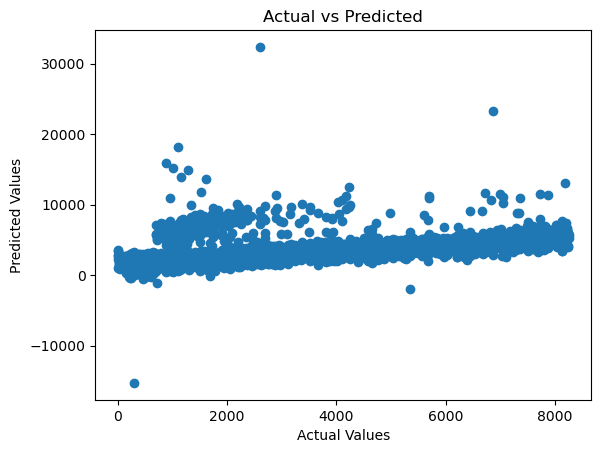

In [144]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

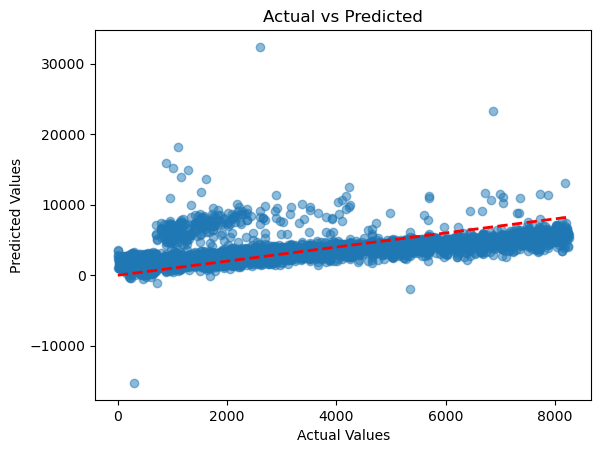

In [146]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

"This graph shows how well our model’s predictions match the actual values. On the X-axis, we have the actual values, and on the Y-axis, we have the values predicted by our model. The red dashed line represents perfect predictions — if a point falls on this line, it means the model got the prediction exactly right.

However, we can see that most points are scattered away from this line, which tells us that the model's predictions aren't very accurate. As the actual values increase, especially above 4000, the model tends to under-predict, as most of the points fall below the red line. There are also some extreme outliers, where the predicted values are way off — either much too high or much too low, showing that the model struggles with certain cases.

In summary, while the model does okay with smaller values, it has trouble with larger ones and makes some big errors, meaning we likely need to improve the model's complexity, adjust the features we’re using, or handle outliers better."

In [145]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.39664575 0.41716231 0.42355187 0.38456038 0.43171505]
Mean CV Score: 0.4107270721299872


# On this Dataframe I am trying to use imputer to fill Nan fields with average value.

The result is Memory error when running the Model.

In [118]:
# Imputing NAN Fields

Real_Estate_data_imputed_df= Real_Estate_data_df.copy()

# Mean imputation for the selected columns
Real_Estate_data_imputed_df['bed'].fillna(Real_Estate_data_imputed_df['bed'].mean(), inplace=True)
Real_Estate_data_imputed_df['bath'].fillna(Real_Estate_data_imputed_df['bath'].mean(), inplace=True)
Real_Estate_data_imputed_df['house_size'].fillna(Real_Estate_data_imputed_df['house_size'].mean(), inplace=True)
Real_Estate_data_imputed_df['acre_lot'].fillna(Real_Estate_data_imputed_df['acre_lot'].mean(), inplace=True)
Real_Estate_data_imputed_df['prev_sold_date'].fillna(Real_Estate_data_imputed_df['prev_sold_date'].mean(), inplace=True)

print("\nDataFrame after Mean Imputation:")
print(Real_Estate_data_imputed_df)


DataFrame after Mean Imputation:
       brokered_by    status     price       bed      bath  acre_lot  \
0          33968.0  for_sale   99000.0  1.000000  1.000000      5.00   
1          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
2          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
3          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
4          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
...            ...       ...       ...       ...       ...       ...   
40106      68915.0  for_sale  467847.0  5.000000  4.000000      0.19   
40107      68915.0  for_sale  345249.0  5.000000  3.000000      0.19   
40108      61150.0  for_sale  325000.0  3.476931  2.678548      0.68   
40109      68915.0  for_sale  456122.0  5.000000  4.000000      0.19   
40110      61150.0  for_sale  325000.0  3.476931  2.678548      0.69   

          street            city  state  zip_code   house_size  \
0        49388.0       Terlingua  T

# Clean Dataset with Bed, Bath, House_size,acre_lot and prev_sold_date imputed with average value. I do this to retain the no. of rows

In [119]:
Clean_Real_Estate_data_imputed_df=Real_Estate_data_imputed_df.dropna() 

Clean_Real_Estate_data_imputed_df.shape

(39911, 12)

In [120]:
transform2_data_df = Clean_Real_Estate_data_imputed_df.copy()

# Calculate the age of the house since it was last sold
transform2_data_df['house_age_since_sold'] = (pd.to_datetime('2024-08-30') - transform2_data_df['prev_sold_date']).dt.days

# Calculate the Price per square foot
transform2_data_df['price_per_sqft'] = transform2_data_df['price'] / transform2_data_df['house_size']

# Calculate the average house value per zip code
average_house_value_per_zipcode = transform2_data_df.groupby('zip_code')['price'].mean().reset_index()

# Rename the column to be more descriptive
average_house_value_per_zipcode.rename(columns={'price': 'average_house_value_per_zipcode'}, inplace=True)

# Merge the average house value per zip code back to the original DataFrame
transform2_data_df = transform2_data_df.merge(average_house_value_per_zipcode, on='zip_code', how='left')

# Pad prices to 6 digits with leading zeros
transform2_data_df['average_house_value_per_zipcode'] = transform2_data_df['average_house_value_per_zipcode'].apply(lambda x: f"{int(x):06d}")
transform2_data_df['price_per_sqft'] = transform2_data_df['price_per_sqft'].apply(lambda x: f"{int(x):06d}")
transform2_data_df['price'] = transform2_data_df['price'].apply(lambda x: f"{int(x):06d}")

# Delete the 'status',column
transform2_data_df = transform2_data_df.drop(columns=['brokered_by','street','status'])


# Identify categorical columns
categorical_columns = ['price','city', 'state', 'zip_code', 'prev_sold_date','price_per_sqft','average_house_value_per_zipcode']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    transform2_data_df[column] = label_encoder.fit_transform(transform2_data_df[column])

transform2_data_df.head()


transform2_data_df.head(10)

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,693,1.000000,1.000000,5.000000,637,0,753,600.000000,3203,3771,165,126
1,372,3.476931,2.678548,1.000000,485,0,682,2314.157354,3203,3771,25,153
2,372,3.476931,2.678548,1.000000,485,0,682,2314.157354,3203,3771,25,153
3,372,3.476931,2.678548,1.000000,485,0,682,2314.157354,3203,3771,25,153
4,372,3.476931,2.678548,1.000000,485,0,682,2314.157354,3203,3771,25,153
5,372,3.476931,2.678548,1.000000,485,0,682,2314.157354,3203,3771,25,153
6,372,3.476931,2.678548,1.040000,485,0,682,2314.157354,3203,3771,25,153
7,5385,4.000000,3.000000,11.630184,321,0,674,2300.000000,3203,3771,207,546
8,341,3.476931,2.678548,1.700000,101,0,719,2314.157354,3203,3771,23,8
9,1994,4.000000,2.000000,1.070000,616,0,752,1460.000000,3203,3771,142,144


# Splitting the dataset into Training and Testing sets allowing 10% Test size

In [121]:
# Set up X and Y variables

X = transform2_data_df.drop(columns=['price'])  # Features (all columns except 'price')
y = transform2_data_df['price']  # Target variable (price)

# Split the data into training and testing sets with 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=42)

# Display the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35919, 11)
X_test shape: (3992, 11)
y_train shape: (35919,)
y_test shape: (3992,)


In [122]:
X_train.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
34730,4.0,2.0,1.00,24,0,502,2108.0,2094,5945,156,561
9826,3.0,2.0,0.25,363,0,40,1476.0,1001,8130,212,557
3931,3.0,2.0,0.19,338,0,440,1765.0,3203,3771,181,547
1162,3.0,3.0,10.24,581,0,523,2300.0,3203,3771,369,599
34000,4.0,3.0,0.41,671,0,457,2746.0,3203,3771,214,613


In [123]:
# checking the dtypes to know which column I need to change.

X_train.dtypes

bed                                float64
bath                               float64
acre_lot                           float64
city                                 int32
state                                int32
zip_code                             int64
house_size                         float64
prev_sold_date                       int64
house_age_since_sold                 int64
price_per_sqft                       int32
average_house_value_per_zipcode      int32
dtype: object

In [124]:
# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [126]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model (compare y_test with y_pred, not y_train)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 1491.9793261173284
MSE: 3639839.484433461
R-squared: 0.31154897709090157


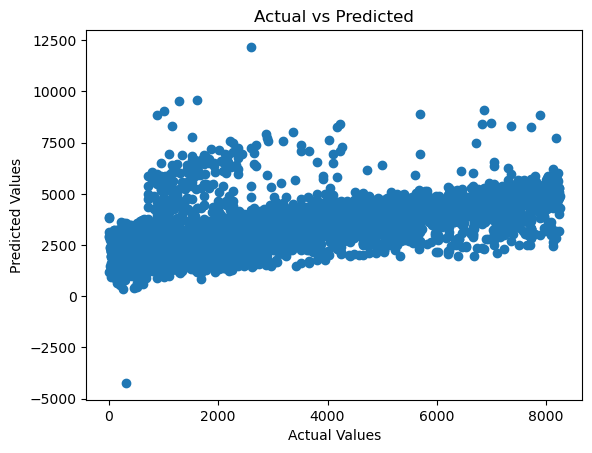

In [127]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Trying to Improve my Model

In [128]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05)
outliers = iso.fit_predict(X_train)
# Remove outliers
X_train, y_train = X_train[outliers == 1], y_train[outliers == 1]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train, y_train)

In [133]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [134]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [135]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {scores.mean()}")

Cross-validation scores: -75429.58394368898


In [136]:
# Convert negative MSE to positive MSE
mse_scores = -scores
mean_mse = mse_scores.mean()
print(f"Cross-validation MSE: {mean_mse}")

Cross-validation MSE: 75429.58394368898


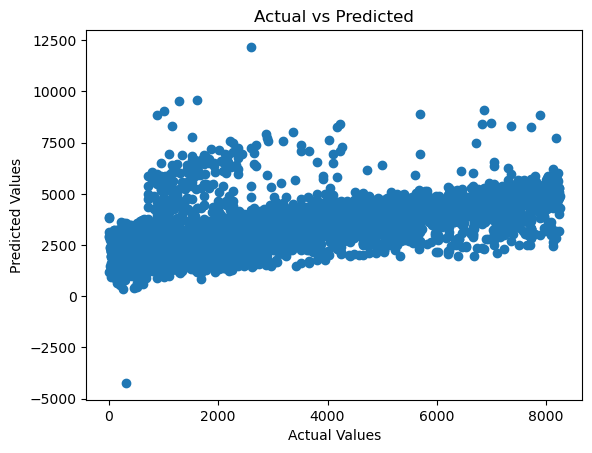

In [137]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

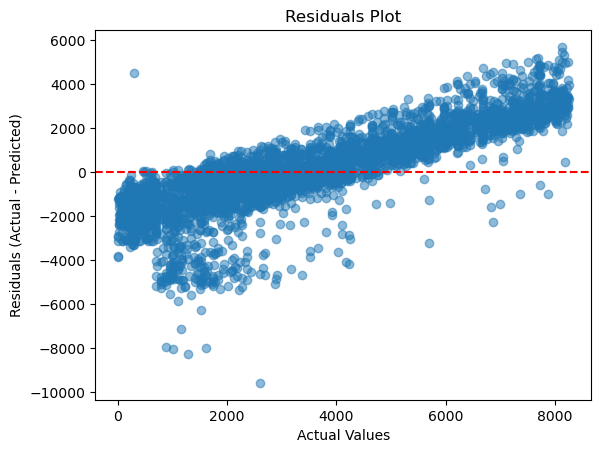

In [138]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()

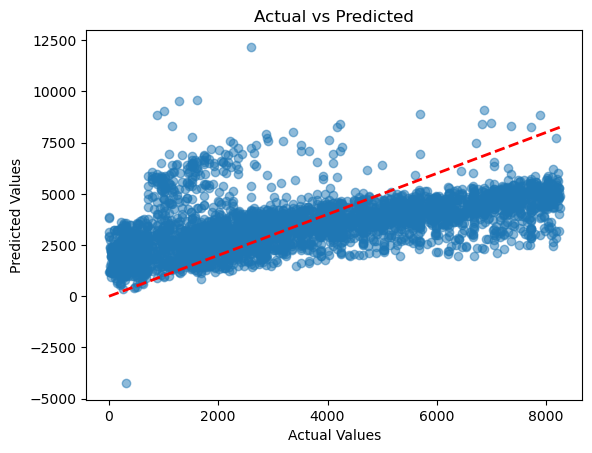

In [139]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# tyring a simple dataset without Feature engineering just a clean prepocess dataset. 

In [153]:
process_data_df=Clean_data_df.copy()

process_data_df.shape

(13363, 12)

In [154]:
process_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
18,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966,5888.0,2014-06-17
19,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948,1872.0,2022-04-28
23,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966,4248.0,2022-05-06
27,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932,1240.0,2022-01-28
28,30107.0,for_sale,134900.0,4.0,2.0,0.29,1463813.0,Newton,Texas,75966,2010.0,2021-07-29


In [155]:
# Verifying that there no more missing datas
print(Clean_data_df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [156]:
reduce_column_df=process_data_df.drop(columns=['brokered_by','status','street','prev_sold_date'])

reduce_column_df.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size
18,349000.0,6.0,5.0,4.41,Newton,Texas,75966,5888.0
19,249500.0,2.0,2.0,1.19,Hemphill,Texas,75948,1872.0
23,479000.0,5.0,4.0,6.28,Newton,Texas,75966,4248.0
27,179900.0,3.0,2.0,2.23,Burkeville,Texas,75932,1240.0
28,134900.0,4.0,2.0,0.29,Newton,Texas,75966,2010.0


In [157]:
# Identify categorical columns
categorical_columns = ['price','city', 'state', 'zip_code']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    transform2_data_df[column] = label_encoder.fit_transform(transform2_data_df[column])

transform2_data_df.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,693,1.000000,1.000000,5.0,637,0,753,600.000000,3203,3771,165,126
1,372,3.476931,2.678548,1.0,485,0,682,2314.157354,3203,3771,25,153
2,372,3.476931,2.678548,1.0,485,0,682,2314.157354,3203,3771,25,153
3,372,3.476931,2.678548,1.0,485,0,682,2314.157354,3203,3771,25,153
4,372,3.476931,2.678548,1.0,485,0,682,2314.157354,3203,3771,25,153


In [159]:
# Set up X and Y variables

X = transform2_data_df.drop(columns=['price'])  # Features (all columns except 'price')
y = transform2_data_df['price']  # Target variable (price)

# Split the data into training and testing sets with 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=42)

# Display the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35919, 11)
X_test shape: (3992, 11)
y_train shape: (35919,)
y_test shape: (3992,)


In [164]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 4.63681441e-01, -6.80034019e-01, -1.04750937e-01, ...,
         1.27809845e+00, -2.00074723e-01,  6.71193420e-01],
       [-4.18822084e-01, -6.80034019e-01, -1.12114676e-01, ...,
         2.56030517e+00,  1.70584021e-01,  6.50703803e-01],
       [-4.18822084e-01, -6.80034019e-01, -1.12703775e-01, ...,
         2.34676641e-03, -3.46020691e-02,  5.99479758e-01],
       ...,
       [ 4.63681441e-01, -6.80034019e-01, -1.12212859e-01, ...,
        -1.39898489e+00, -6.76965998e-02,  5.63622927e-01],
       [-4.18822084e-01, -6.80034019e-01, -3.80409873e-04, ...,
        -1.71117435e+00,  5.47861671e-01, -1.77731590e+00],
       [ 4.63681441e-01,  1.32935174e+00, -1.12016493e-01, ...,
         2.34676641e-03, -3.46020691e-02,  3.63849154e-01]])

In [165]:
# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [166]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [167]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model (compare y_test with y_pred, not y_train)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 1491.9793261173284
MSE: 3639839.484433461
R-squared: 0.31154897709090157


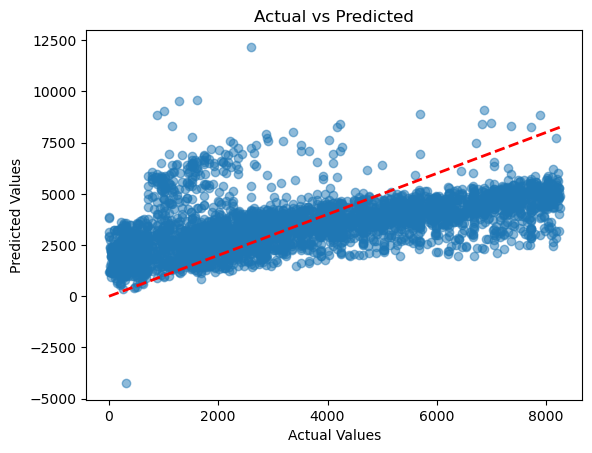

In [168]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Natalie

# Russel

# Michael

# Lerma